In [1]:
# Header mit Autor einfügen!!!!

In [2]:
%matplotlib inline

In [3]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import warnings; warnings.filterwarnings('ignore')

In [4]:
# Settings for MC simulation
features_max     = 201
observations_max = 51
mc_iterations    = 3

# Define range objects
range_mc   = range(1, mc_iterations+1)
range_obs  = range(10, observations_max, 10)
range_feat = range(5, features_max, 55)

# df to collect results while running
df = pd.DataFrame(columns=['mc_iteration', 'no_observations', 'no_features', 'mean_score'])

for mc_iteration in range_mc:
    
    # Create X and y randomly each iteration
    #X = np.random.randn(observations_max, features_max)
    X = np.random.normal(loc=0.0, scale=1.0, size=[observations_max, features_max])
    y = np.random.choice([0,1], size=observations_max) 
    
    # Loop over observations and features and fit model
    for no_observations in range_obs: 
        for no_features in range_feat: 

            # Get data to fit model
            y_tmp = y[:no_observations]
            X_tmp = X[:no_observations,:no_features]

            # Fit model and perform cross-validation (quasi LOOCV)
            clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=5)
            cv_scores = cross_val_score(clf, X_tmp, y_tmp, cv=round(len(y_tmp)/2), n_jobs=-1)   

            # Collect results
            df_tmp = pd.DataFrame({'mc_iteration': mc_iteration, 
                                   'no_observations': no_observations,
                                   'no_features': no_features,
                                   'mean_score': np.mean(cv_scores),
                                   }, index=[0])
            df = pd.concat([df, df_tmp])
            
            # Print current results
            #print(df_tmp)


In [5]:
df.to_csv('MS_sim_data.csv', sep=',')

In [6]:
#df_viz = df.groupby(['no_observations', 'no_features']).agg(['mean'])
#df_viz = df_viz.reset_index()

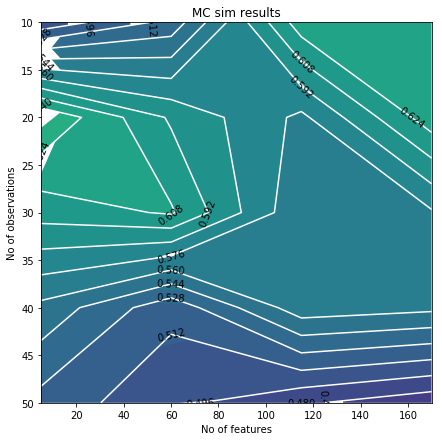

In [9]:
# Get x, y and meshgrid
x = range_feat
y = range_obs
X, Y = np.meshgrid(x, y)

# Get aggregated values for Z
Z = pd.pivot_table(df, values=['mean_score'], index=['no_observations'], columns=['no_features']).values

# Draw contour plot
fig, ax = plt.subplots()
plt.gca().invert_yaxis()
fig.set_size_inches(7, 7)
plt.ylabel('No of observations')
plt.xlabel('No of features')
levels = np.linspace(0.4, 0.8, 26, endpoint=True)
CS = ax.contour(X, Y, Z, levels, colors='white', antialiased=True)
CS = ax.contourf(X, Y, Z, levels, antialiased=True)
ax.clabel(CS, inline=1, fontsize=10, colors='black')
ax.set_title('MC sim results');